In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMGN', 'AMZN',
    'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG',
    'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED',
    'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD', 'LULU', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PYPL', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW',
    'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'BYRN', 'CIZN', 'CUBE', 'EP', 'EXR', 'FCPT',
    'FCUV', 'GBOX', 'GME', 'INTZ', 'KREF', 'MCVT', 'MICS', 'MNMD',
    'OMQS', 'PETV', 'POWW', 'PRPH', 'RA', 'RVP', 'VIRT', 'WAVD', 'WKHS',
    ='ZYXI']
BEST_WEIGHTED = [
    'AMRC', 'AMZN', 'BAH', 'CF', 'COOP', 'CSIQ', 'CTSH', 'CVE', 'DTST',
    'ENPH', 'GCBC', 'GGE', 'LFMD', 'MOBQ', 'NTAP', 'RFP', 'SOBR', 'TJX',
    'TSLA', 'VTSI']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

73

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-10-01', datetime.date(2022, 10, 1))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  122 of 122 completed
Generating derived columns...
AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMGN... AMRC... AMRK... AMZN... ANET... APT... ASML... AXON... BAH... BROS... BYND... BYRN... CF... CHWY... CIZN... COOP... CRWD... CSIQ... CTSH... CUBE... CVE... DDOG... DOCS... DOCU... DTST... DUOL... EDIT... ENPH... EP... ETSY... EXR... FCPT... FCUV... FLGT... GBOX... GCBC... GGE... GH... GME... GMED... GOOG... IDXX... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTCH... NTAP... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PANW... PAYC... PETV... PINS... POWW... PRPH... PYPL... QDEL... RA... RBLX... RDFN... RFP... RGEN... RIVN... ROKU... RVLV... RVP... SE... SHOP... SNOW... SOBR... TASK... TDOC... TEAM... TJX... TREX... TSLA... TTD... TTWO... TWLO... TWTR... TYL... UPST... VEEV... VIRT... VLD... VRTX... VTSI... WAVD... WKHS... XPE

In [5]:
data['Date'].tail()

2512   2022-09-26
2513   2022-09-27
2514   2022-09-28
2515   2022-09-29
2516   2022-09-30
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.000872
2       1.003624
3       1.007174
4       0.999678
5       0.996543
          ...   
2512    0.989659
2513    0.997880
2514    1.019672
2515    0.978874
2516    0.984933
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.003922
2,1.006743
3,1.013536
4,1.000000
5,1.000000
...,...
2512,1.001635
2513,1.023375
2514,1.051114
2515,0.992686


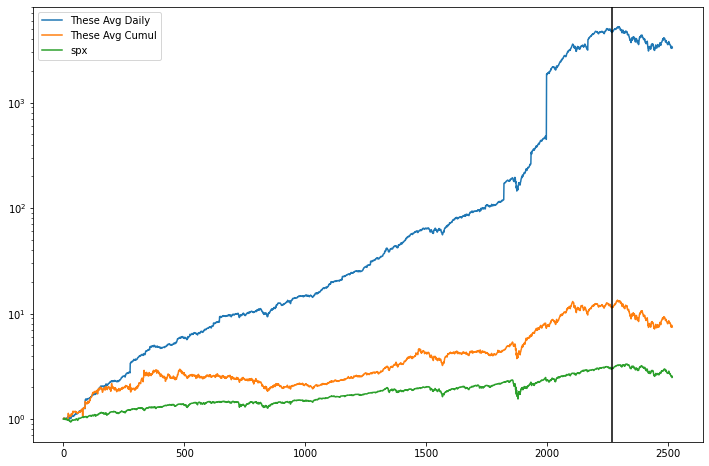

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-10-01,NaN,NaN
1,2012-10-02,1.003084,1.003084
2,2012-10-03,1.013505,1.014613
3,2012-10-04,1.022350,1.023999
4,2012-10-05,1.017476,1.021733


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-09-26,3268.161523,7.428578
2513,2022-09-27,3300.077507,7.547009
2514,2022-09-28,3416.693933,7.752488
2515,2022-09-29,3323.129621,7.534039
2516,2022-09-30,3302.366991,7.456433


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

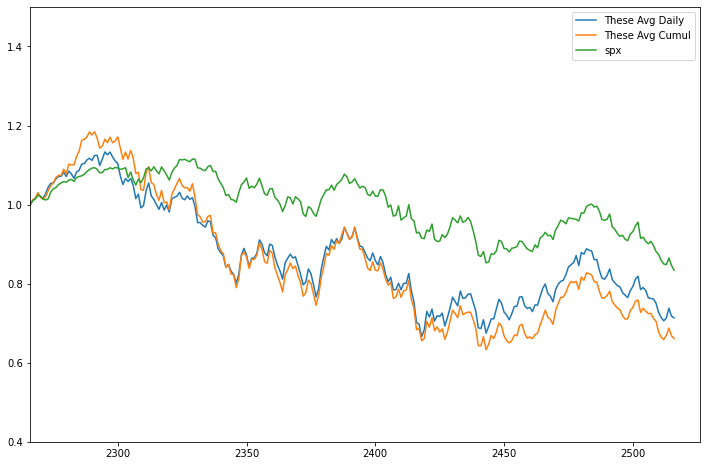

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,77.519997,77.519997,79.540001,74.500000,75.360001,4.350536,1.028662,1.013333,0.985098
2458,72.709999,72.709999,76.000000,71.500000,75.989998,4.286479,0.956836,0.937952,0.980263
2459,72.510002,72.510002,74.110001,70.238998,72.769997,4.283725,0.996427,0.997249,1.000825
2460,71.110001,71.110001,73.254997,68.519997,68.949997,4.264228,1.031327,0.980692,0.950903
2461,67.779999,67.779999,70.089996,67.260002,69.970001,4.216267,0.968701,0.953171,0.983969


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,77.519997,77.519997,79.540001,74.500000
2458,72.709999,72.709999,76.000000,71.500000
2459,72.510002,72.510002,74.110001,70.238998
2460,71.110001,71.110001,73.254997,68.519997
2461,67.779999,67.779999,70.089996,67.260002


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,77.519997,77.519997,79.540001,74.500000,76.000000,71.500000,0.980392,0.922343
2458,72.709999,72.709999,76.000000,71.500000,74.110001,70.238998,1.019255,0.966016
2459,72.510002,72.510002,74.110001,70.238998,73.254997,68.519997,1.010274,0.944973
2460,71.110001,71.110001,73.254997,68.519997,70.089996,67.260002,0.985656,0.945859
2461,67.779999,67.779999,70.089996,67.260002,69.330002,66.519997,1.022868,0.981410


0.05    0.972511
Name: HighMult, dtype: float64


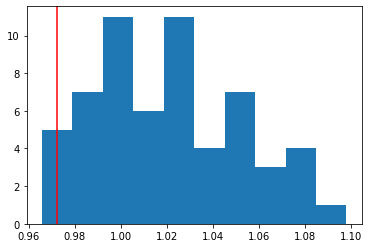

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.015697371611524


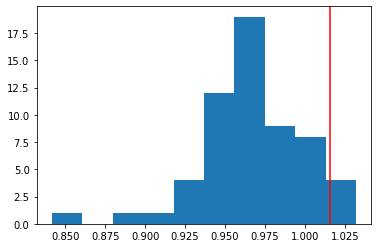

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.015697371611524, 0.9725107768702285)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0060613400209928, 0.9915488508563829)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,77.519997,77.519997,79.540001,74.500000,76.000000,71.500000,0.980392,0.922343,0
2458,72.709999,72.709999,76.000000,71.500000,74.110001,70.238998,1.019255,0.966016,0
2459,72.510002,72.510002,74.110001,70.238998,73.254997,68.519997,1.010274,0.944973,0
2460,71.110001,71.110001,73.254997,68.519997,70.089996,67.260002,0.985656,0.945859,0
2461,67.779999,67.779999,70.089996,67.260002,69.330002,66.519997,1.022868,0.981410,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.012017586398899, 0.971874626300091, 1.0162802549414012, 0.9783938317795097)

In [27]:
get_hilo_mults(aapl)

(1.0093638151377504, 0.9986839811431117, 1.0035369385556, 0.9865324601618932)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.009364,0.998684,1.003537,0.986532
1,ABMD,1.001096,0.989183,1.003433,0.992843
2,ABNB,1.017644,0.985043,1.008468,0.991331
3,ADBE,1.005738,0.990159,1.010554,0.970441
4,ADYEY,1.031267,0.970926,1.016435,0.957703


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,138.199997,AAPL
ABMD,245.660004,ABMD
ABNB,105.040001,ABNB
ADBE,275.200012,ADBE
ADYEY,12.52,ADYEY
...,...,...
ZM,73.589996,ZM
ZYXI,9.07,ZYXI
^GSPC,3585.620117,^GSPC
^IXIC,10575.619141,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.009364,0.998684,1.003537,0.986532,138.199997
1,ABMD,1.001096,0.989183,1.003433,0.992843,245.660004
2,ABNB,1.017644,0.985043,1.008468,0.991331,105.040001
3,ADBE,1.005738,0.990159,1.010554,0.970441,275.200012
4,ADYEY,1.031267,0.970926,1.016435,0.957703,12.52


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv